# Monte Carlo simulation

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from numpy.random import rand
import seaborn as sns

### Abstract

In this paper, we will take a closer look at one particular method of computer simulation - the Monte Carlo simulation.

We will compare its accuracy and time to perform with another method for numerical integration - the trapezoid rule. 

Finally, we will examine roulette game with Monte Carlo simulation, plotting different scenarios with different probabilities of outcome and we will observe the results.

## Introduction

### What is computer simulation, where is most commonly used and why is useful?

[Computer simulation](https://plato.stanford.edu/entries/simulations-science/#ComSimStrSciThe) is a method in which we will use computer to solve, or to approximately solve, the mathematical equations of a model that is meant to represent some system—either real or hypothetical.

In the context of computer simulation, we will refer to an entire process. This process includes choosing a model; finding a way of implementing that model in a form that can be run on a computer; calculating the output of the algorithm, and visualizing and studying the resultant data. The method includes this entire process—used to make inferences about the target system that one tries to model—as well as the procedures used to sanction those inferences.

Computer simulation was pioneered as a scientific tool in meteorology and nuclear physics in the period directly following World War II, and since then has become indispensable in a growing number of disciplines. The list of sciences that make extensive use of computer simulation has grown to include astrophysics, particle physics, materials science, engineering, fluid mechanics, climate science, evolutionary biology, ecology, economics, decision theory, medicine, sociology, epidemiology, and many others. There are even a few disciplines, such as chaos theory and complexity theory, whose very existence has emerged alongside the development of the computational models they study.

 [In science the most common methods](https://en.citizendium.org/wiki/Computer_simulation) of computer simulations are:
* A numerical simulation of differential equations that cannot be solved analytically, theories that involve continuous systems such as phenomena in physical cosmology, fluid dynamics (e.g. climate models, roadway noise models, roadway air dispersion models).
* A stochastic simulation, typically used for discrete systems where events occur probabilistically, and which cannot be described directly with differential equations (this is a discrete simulation in the above sense). Phenomena in this category include genetic drift, biochemical or gene regulatory networks with small numbers of molecules.

Some specific examples are:

* Statistical simulations based upon an agglomeration of a large number of input profiles, such as the forecasting of the equilibrium temperature of receiving waters, allowing the gamut of meteorological data to be input for a specific locale. This technique was developed for thermal pollution forecasting.
* Agent-based simulation has been used effectively in ecology, where it is often called individual based modeling and has been used in situations for which individual variability in the agents cannot be neglected, such as population dynamics of salmon and trout (most purely mathematical models assume all trout behave identically).
* Time stepped dynamic model. In hydrology, there are several such hydrology transport models such as the SWMM and DSSAM Models developed by the U.S. Environmental Protection Agency for river water quality forecasting.
* Computer simulations have also been used to formally model theories of human cognition and performance, e.g. ACT-R
* Computer simulation has been applied to social systems and artificial societies.
* A computer simulation using molecular modeling for drug discovery was developed Quantum 3.1 to achieve the level of accuracy of simulation equal to the chemical or in-vitro tests.
* Computational fluid dynamics simulations are used to simulate the behavior of flowing air, water, and other fluids. There are one-, two- and three-dimensional models used. A one-dimensional model might simulate the effects of water hammer in a pipe. A two-dimensional model might be used to simulate the drag forces on the cross-section of an airplane wing. A three-dimensional simulation might estimate the heating and cooling requirements of a large building.

Simulations are very useful when precise mathematical treatment for a given process is not possible, or it might be difficult, time-consuming, or expensive to analyze. In these situations, simulation may approximate real-world results; yet, require less time, effort, and/or money than other approaches.

They are an invaluable tool for statistical research to model random events in a way to simulate outcomes closely matched with real-world outcomes. By observing simulated outcomes, researchers gain insight into the real world.

With simulations we can model only known random processes, that have initial conditions, variables and distribution


## Monte Carlo simulation

### What is Monte Carlo Simulation (method)?

Monte Carlo simulations is a statistical technique used to model probabilistic (or “stochastic”) systems and establish the odds for a variety of outcomes. Monte Carlo is one of the methods for solving finite Markov decision problems, together with dynamic programming and temporal-difference learning. Each class of methods has its strengths and weaknesses. Dynamic programming methods are well developed mathematically but require a complete and accurate model of the environment. Monte Carlo methods don’t require a model and are conceptually simple, but are not well suited for step-by-step incremental computation. Finally, temporal-difference methods require no model and are fully incremental, but are more complex to analyze. The methods also differ in several ways with respect to their efficiency and speed of convergence.* 

[The term ](https://en.wikipedia.org/wiki/Monte_Carlo_method) was coined by the  Polish-American mathematician Stan Ulam in the late ’40s who was then working on the Manhattan project (aka The Atomic Bomb Project). The inception of the idea was when Ulam was recovering from brain surgery, he kept himself busy by playing countless games of solitaire. “After spending a lot of time trying to estimate them by pure combinatorial calculations, I wondered whether a more practical method than “abstract thinking” might not be to lay it out say one hundred times and simply observe and count the number of successful plays.” 

Actually, such a method was available as for project Manhattan the very first general-purpose electronic computer was developed. After Ulman shared his idea with John von Neumann ( onе of the lead mathematician on the project), Neumann immediately saw the significance of this insight that could be used for the purposes of the Manhattan project. The two collaborated to develop the method. As the project was highly classified, this method needed a code name and “Monte Carlo” was chosen, in a nod to the Monaco casino town (where Ulam’s uncle gambled). 

The basis of a Monte Carlo simulation is that the probability of varying outcomes cannot be determined because of random variable interference. Therefore, a Monte Carlo simulation focuses on constantly repeating random samples to achieve certain results. 

A Monte Carlo simulation takes the variable that has uncertainty and assigns it a random value. The model is then run and a result is provided. This process is repeated again and again while assigning the variable in question with many different values. Once the simulation is complete, the results are averaged together to provide an estimate. 

Nowadays Monte Carlo simulation is used across industries to facilitate both automated and human-intermediated decisions involving uncertainty, such as Physical sciences, Engineering, Climate change, and radiative forcing, Computational biology, Computer graphics, Applied statistics, Artificial intelligence, Finance and business, Law, Mathematics, etc. 

*Sutton, Richard and Barto, Andrew. Reinforcement learning.An introduction. Second edition, MIT press 2018

## Practical examples of Monte Carlo method

### How accurate is Monte Carlo method compared to other methods?

In this section of the paper, we will try to prove that Monte Carlo simulation is fast in performance, but is less accurate compared to other, more precise methods, such as the trapezoid method.

* ### Approximation of $\pi$ with Monte Carlo simulation

For the purposes of estimating $\pi$ we will approximate real $\pi$ to the 10th decimal point.

In [3]:
pi_real = 3.1415926535

One way to compute $\pi$ is from the ratio of unit circle(radius is 1) area and unit square area:

$$ A (circle) = \pi r^2$$

$$ A (square) = (2r)^2$$


$$\frac {A\hspace{1mm}m}{A\hspace{1mm}n} = \frac {\pi r^2} {(2r)^2} = \frac {\pi} {4}\hspace{1mm} or \hspace{1mm} \pi = 4 \frac {A\hspace{1mm}m}{A\hspace{1mm}n}$$

<img src="Unit circle and unit square.JPG" style="max-height: 200px" alt="Left triangle" /> 

Now let's imagine we are playing pebbles on a beach - we are throwing randomly pebbles at the square. For each trial we either throw in the circle - hit, or we throw outside of the circle - miss. In this way, using Monte Carlo method and the above calculation, we can approximate $\pi$ - applying the rule of large numbers, the more trials we have, the closer we get to number $\pi$.
$$\frac {A\hspace{1mm}hits}{A\hspace{1mm} trials} = 4 \frac {A\hspace{1mm} m}{A\hspace{1mm} n}$$

In [4]:
trials = 1000000
xvalue = []
yvalue = []
hits = []
hits_count = 0

for _ in range(trials):
    x, y = random.random(), random.random()

    xvalue.append(x)
    yvalue.append(y)

    if x ** 2 + y ** 2 < 1:
        hits_count += 1
        hits.append('Red')

    else:
        hits.append('Blue')

print(4 * hits_count / trials)

3.140516


Plotting 1 quadrant of the unit circle

In [5]:
def plot_pi(num_points):    
    circle_x = np.linspace(0, 1, 500)
    circle_y = np.sqrt(1 - circle_x**2)

    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title("Monte Carlo $\pi$ Estimation")
    plt.plot(circle_x, circle_y)
    plt.scatter(xvalue[0:num_points], yvalue[0:num_points], c=hits[0:num_points])

    plt.show()

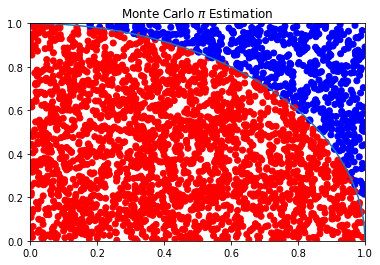

In [6]:
plot_pi(3000)

In [7]:
def plot_pi_(num_points): 
    theta = np.linspace( 0 , 2 * np.pi , 150 )

    radius = 1

    a = radius * np.cos( theta )
    b = radius * np.sin( theta )

    figure, axes = plt.subplots( 1 )

    axes.plot( a, b )
    axes.set_aspect( 'equal', 'box' )
    plt.scatter(xvalue[0:num_points], yvalue[0:num_points], c=hits[0:num_points])

    plt.title("Monte Carlo $\pi$ Estimation")
    plt.show()


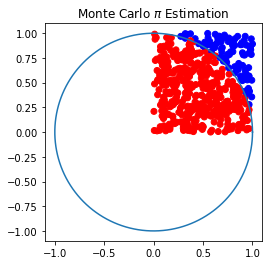

In [8]:
plot_pi_(500)

* ### Estimating $\pi$ with numerical integration using Monte Carlo method

We can approximate $\pi$ by integrating function $\sin\theta$ (when the limits of the functions are from 0 to 1) multiplied by 4 ( when the radius is equal to 1).
<img src="unit_circle.JPG" style="max-height: 200px" alt="Left triangle" /> 
>Given that $\sin\theta = y \hspace{1mm}and\hspace{1mm}\cos\theta = x \hspace{1mm}and\hspace{1mm}r = 1$
>
>$ y^2 + x^2 = r^2$
$\Rightarrow y = \sqrt{R^2 - x^2} = \sqrt{1 - x^2}$
>
>$S = 4 \int_0^1\sqrt{1 - x^2}dx $


Now, with Monte Carlo simulation, to estimate $\pi$, we can sample n random numbers xᵢ, i=1,…n between 0 and 1, calculate f(xᵢ) [for them and take the average](https://www.cantorsparadise.com/estimating-%CF%80-using-monte-carlo-simulations-3459a84b5ef9). If we multiply this by four, it will approximately equal $\pi$.
$$\pi \approx 4\frac{1}{n} \sum_{i=1}^{n}f(x_{i})$$


This is a commonly used method to estimate discrete integrals, especially when the exact calculation of the integral is too expensive or finding the antiderivative is not possible. Let's also estimate the precision of the method and the time to execute it.

In [9]:
def area_unit_circle_MC(trials=6000000):
    start_time = time.time()
    n = trials
    random_numbers = np.random.uniform(0,1, 6000000)
    f = np.sqrt(1 - random_numbers**2)

    sum = np.sum(f)
    pi = 4 * (1 / n) * sum
    accuracy = (pi -  3.1415926535)/ 3.1415926535
    return f'pi estimation is {pi} and time to execute is {time.time() - start_time:.5f} seconds and accuracy {accuracy}'


print(area_unit_circle_MC(6000000))


pi estimation is 3.1411529898201396 and time to execute is 0.14461 seconds and accuracy -0.0001399492958995361


To compare the accuracy and time to execute of Monte Carlo integration simulation let's see how the same estimation is performed with the [the trapezoid method](http://www.mathwords.com/t/trapezoid_rule.htm). 

The trapezoidal rule works by approximating the region under the graph of the function f(x) as a trapezoid and calculating its area. 

$$\int_ {a} ^{b} f(x)\text{d}x = \frac{\Delta x}{2}[f(x_0) + 2f(x_1)+ 2f(x_2) +2f(x_3)+......2f(x_n-1)+f(x_n)] $$

The $\int_ {a} ^{b} f(x)\text{d}x$  is estimated by adding the areas of all trapezoids {$x_1,x_2,x_3,......x_n$}.

The width $\Delta x$ of each trapezoid is given by $\Delta x = \frac{b-a}{n}$

The same as with Monte Carlo - the more number points of estimations we have - the more accurate result we get.

In [10]:
def area_unit_circle_trapz(function, a=0, b=1, n=6000000):
    start_time = time.time()
    x = np.linspace(a, b, n + 1)
    circle_area = 4 * (np.trapz(function(x), x))
    accuracy = (circle_area - 3.1415926535)/3.1415926535
    return f'pi estimation is {circle_area}, time to execute is {time.time() - start_time:.5f} seconds and accuracy {accuracy}'


print(area_unit_circle_trapz(lambda x: np.sqrt(1 - x ** 2), 0, 1, 6000000))


pi estimation is 3.141592653509778, time to execute is 0.15911 seconds and accuracy 3.1124201323762355e-12


After comparing both methods in accuracy and time for performance, we can see that Monte Carlo integration is faster but less precise than the Trapezoid method for this particular case.

Another observation we can make is that after we repeat both simulations n number of times:
* with Monte Carlo simulation we approximate randomly $\pi$ number with values greater or smaller than $\pi$.
* with the Trapezoid rule we approximate consistently $\pi$ number with values smaller than $\pi$.

* ### Monte Carlo simulation for an American  Roulette game

With Monte Carlo simulation we will try to prove that casino games are designed in a way to always favor the house - the odds are always in the favor of the casino. We will simulate n number of games with a different win and loose probabilities( see the table below for win and loose probability odds).

After that, we will simulate 4 different games with 10,25,100,1000 number of roulette spins each performed  500 times, assuming the players bet 1$ for each game( each time betting on the same outcome) and we will try to prove that the more games we play the more money we lose.

Casino games such as craps and roulette are designed to favor the casino. This arises from the way in which the payouts for different outcomes are constructed. 

 
An American roulette wheel consists of the numbers 1 through 36, as well as 0 and 00. Betting on a single number pays out 35 to 1. In addition to returning your original bet, you would win 35 dollars for each 1 dollar that was bet. In addition to betting on a single number, you can bet on combinations of numbers. For example, you can bet on all even numbers or all odd numbers, which payout 1 to 1. You can be on all red or all black numbers, which also pays out 1 to 1. You can bet on one of the three columns of numbers, which pays out 2 to 1. For these combinations, if the ball were to land on 0 or 00, it would not payout.

<img src="American_roulette.JPG" style="max-height: 200px" alt="Left triangle" /> 

One might think that it won't be that hard to win against the casino, assuming the roulette is fair, but in reality, the odds are always stacked against the players and there are several reasons for that:
* You can try to guess the color of the number. Black or red. However, there is a third color that the casino will not let you choose, on 2 extra numbers 0 and 00, which is green. 
* You can try to guess if the number will be even or odd, but 0 and 00 don’t count as even or odd.
* If you try to guess the zone, you still have 2/3 of the board against you. Here you can bet on all thirds available and "win", but you will not make any money, because each third pays 2 to 1.
* If you bet on a single number the payout is substantial, if you guessed right - it pays 35 to 1, the odds against you winning are 37 to 1.


We will use the following table to calculate for each outcome the win and loss probability.


<table><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>Bet name</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>Winning spaces</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>Payout</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>Odds&nbsp;against winning (American)</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>0</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>0</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>35 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>37 to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>0</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>0</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>35 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>37 to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>Straight up</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>Any single number</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>35 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>37 to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>Row</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>0, 00</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>17 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>18 to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>Split</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>any two adjoining numbers vertical or horizontal</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>17 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>18 to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>Street</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>any three numbers horizontal (1, 2, 3 or 4, 5, 6, etc.)</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>11 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>11+2⁄3&nbsp;to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>Corner</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>any four adjoining numbers in a block (1, 2, 4, 5 or 17, 18, 20, 21, etc.)</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>8 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>8+1⁄2&nbsp;to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>Top line or Basket (US)</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>0, 00, 1, 2, 3</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>6 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>6+3⁄5&nbsp;to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>Top line or Basket (European)</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>0, 1, 2, 3</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>8 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>Six line</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>any six numbers from two horizontal rows (1, 2, 3, 4, 5, 6 or 28, 29, 30, 31, 32, 33 etc.)</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>5 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>5+1⁄3&nbsp;to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1st column</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>2 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>2+1⁄6&nbsp;to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>2nd column</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>2 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>2+1⁄6&nbsp;to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>3rd column</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>2 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>2+1⁄6&nbsp;to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1st dozen</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1 through 12</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>2 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>2+1⁄6&nbsp;to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>2nd dozen</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>13 through 24</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>2 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>2+1⁄6&nbsp;to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>3rd dozen</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>25 through 36</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>2 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>2+1⁄6&nbsp;to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>Odd</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1, 3, 5, ..., 35</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1+1⁄9&nbsp;to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>Even</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>2, 4, 6, ..., 36</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1+1⁄9&nbsp;to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>Red</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, 3</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1+1⁄9&nbsp;to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>Black</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>15, 4, 2, 17, 6, 13, 11, 8, 10, 24, 33, 20, 31, 22, 29, 28, 35, 26</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1+1⁄9&nbsp;to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1 to 18</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1, 2, 3, ..., 18</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1+1⁄9&nbsp;to 1</span></p></div></div></td></tr><tr><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>19 to 36</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>19, 20, 21, ..., 36</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1 to 1</span></p></div></div></td><td class="border_l border_r border_t border_b selected" style="text-align: left;"><div class="wrap"><div style="margin: 10px 5px;"><p><span>1+1⁄9&nbsp;to 1</span></p></div></div></td></tr></table>

Here we will use those probabilities to simulate the outcome of n random spins of a roulette, where 1 is win and -1 is loose. Every time we bet on the same outcome.

In [11]:
def get_outcome(num_plays,outcome_prob):
    """
    Betting on a single number -probabilities for loosing: 37 to 38 and to win: 1 to 38.
    For every win +1 USD and for every loss -1 USD.
    """
    n = num_plays
    prob = outcome_prob
    spin = np.random.choice((-1, 1), n, p=prob)
    sum = np.sum(spin)
    return sum


num_plays = 10000000
outcome_prob = [37 / 38, 1 / 38]
total = get_outcome(num_plays,outcome_prob)


print(f"The Total Earnings for this Player is: $ {total} from initial {num_plays} ")
print("The Rate of Return following this monte carlo simulation is:", round(total/num_plays, 4) * 100, '% after',num_plays, 'spins')

The Total Earnings for this Player is: $ -9473246 from initial 10000000 
The Rate of Return following this monte carlo simulation is: -94.73 % after 10000000 spins


Let's see the results for odd number probabability: 20 vs 38 to loose and 18 to 38 to win.

In [12]:
num_plays = 10000000
"""
Betting on even number - probabilities for loosing: 20 to 38 and to win: 18 to 38.
For every win +1 USD and for every loss -1 USD.
"""
outcome_prob = [10 / 19, 9 / 19]
total = get_outcome(num_plays,outcome_prob)


print(f"The Total Earnings for this Player is: $ {total} from initial {num_plays} ")
print("The Rate of Return following this monte carlo simulation is:", round(total/num_plays, 4) * 100, '% after',num_plays, 'spins')

The Total Earnings for this Player is: $ -526082 from initial 10000000 
The Rate of Return following this monte carlo simulation is: -5.26 % after 10000000 spins


Now we will deep dive into Monte Carlo simulation with 4 different games (bet is the same) - 10,25,100,1000 number of roulette spins each performed  500 times

After the simulation is performed we will create  4 histograms( for each game) to show the distributions of total earnings for the simulations.

In [13]:
roulette_plays = [10,25,100,1000]

roul_ten = []
roul_twent = []
roul_onehundred = []
roul_one_thousand = []
# in roulette_sim_array we will collect the results from the 4 games
roulette_sim_array = []
for i in roulette_plays:
    x = 1
    while x<=500:
        x+= 1
        if i == 10:
            roul_ten.append(get_outcome(i,[10 / 19, 9 / 19]))
        elif i == 25:
            roul_twent.append(get_outcome(i,[10 / 19, 9 / 19]))
        elif i == 100:
            roul_onehundred.append(get_outcome(i,[10 / 19, 9 / 19]))
        else:
            roul_one_thousand.append(get_outcome(i,[10 / 19, 9 / 19]))
        
# now we will reshape and stack the lists into a 2 dimensional numpy array
roulette_sim_array = np.vstack([roul_ten,roul_twent,roul_onehundred,roul_one_thousand])
roulette_sim_array = np.array(roulette_sim_array, ndmin = 2)#2-d array
#For the purposes of plotting the results in 4 columns and 500 rows we have to transpose the data and convert it to dataframe
roulette_sim_array.shape
roulette_df = pd.DataFrame(roulette_sim_array).T
#defining our column names for each monte carlo simulation
roulette_df.columns = ['10','25','100','1000']


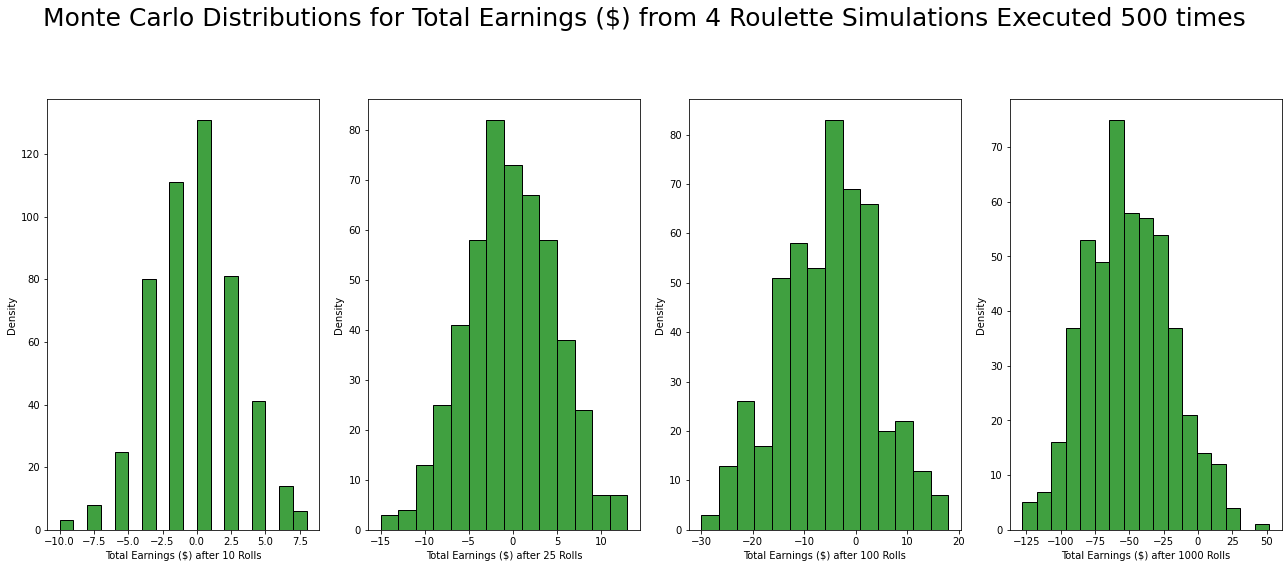

In [15]:
hist, axes = plt.subplots(ncols=4)
hist.set_size_inches(18, 8)
rolls = [10,25,100,1000] 
#multiple histograms on the same line with seaborn/matplotlib
for i,j, ax, col in zip(range(4),rolls,axes, roulette_df.columns):
    sns.histplot(roulette_df[col], ax=ax, color='g')
    axes[i].set_xlabel('Total Earnings ($) after '+ str(j) +' Rolls')
    axes[i].set_ylabel('Density')
hist.tight_layout()
hist.subplots_adjust(top=0.82)
hist.suptitle('Monte Carlo Distributions for Total Earnings ($) from 4 Roulette Simulations Executed 500 times', size = 25)
plt.show()

Looking at the graphics we can see that as the number of rolls increases the mean negative total earnings also increases, showing that is extremely rare for players to break even if they play 1000 games of roulette. It appears in our fourth histogram, that profiting after 1000 spins is about 2 standard deviations above the mean, so only approximately 2% of players will fall into this category. The first histogram (10 rolls executed 500 times) seems normally distributed around 0 which insinuates that you have roughly equal chances of winning and losing. This is more or less accurate because gamblers don't usually consider the 3% discrepancy in their vs. the casino's odds of winning. Seems like the more games we play the more money we lose.

## Conclusion

Monte Carlo simulation is a very useful approach to scientific computing due to its simplicity and general applicability. As we have seen with roulette simulation, the method is very efficient with large-scale tasks and gives explanations where the randomness of the process is highly inherited and when is difficult or impossible to use other approaches.


## References

* Monte Carlo Roulette simulation : [code reference ](https://github.com/Ryanondocin2019/Roulette_MonteCarlo_Sim_PySpark/blob/main/Roulette%20Monte%20Carlo%20Simulation%20and%20Gap%20Minder%20Dataset%20Transformation%20using%20PySpark.ipynb) 
* $\pi$ numerical integration:[code reference ](https://github.com/jvendrow/Monte-Carlo-Methods/blob/master/Monte_Carlo_Pi.py)